# Machine Exercise 2
### Prepared by: CAYAS, Ryan Roi [2022-22085]

## Prerequisites

We first import the required packages and load the necessary files.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, mean_squared_error

In [3]:
import random
random.seed(0)

In [95]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning) 

## Part 1. Classifying Palmer Penguin Species

In [4]:
penguin_df = pd.read_csv('penguin/penguins_size.csv')
penguin_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [5]:
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
X = penguin_df.iloc[:,[2,4]]
y = penguin_df['species']

print(X.shape)
print(y.shape)
print(X.head())
print(y[:5])

(344, 2)
(344,)
   culmen_length_mm  flipper_length_mm
0              39.1              181.0
1              39.5              186.0
2              40.3              195.0
3               NaN                NaN
4              36.7              193.0
0    Adelie
1    Adelie
2    Adelie
3    Adelie
4    Adelie
Name: species, dtype: object


In [7]:
nan_indices = X[X.isna().any(axis=1)].index

X = X.dropna()
y = np.delete(y, nan_indices)

print(X.shape)
print(y.shape)

(342, 2)
(342,)


<Figure size 1000x1000 with 0 Axes>

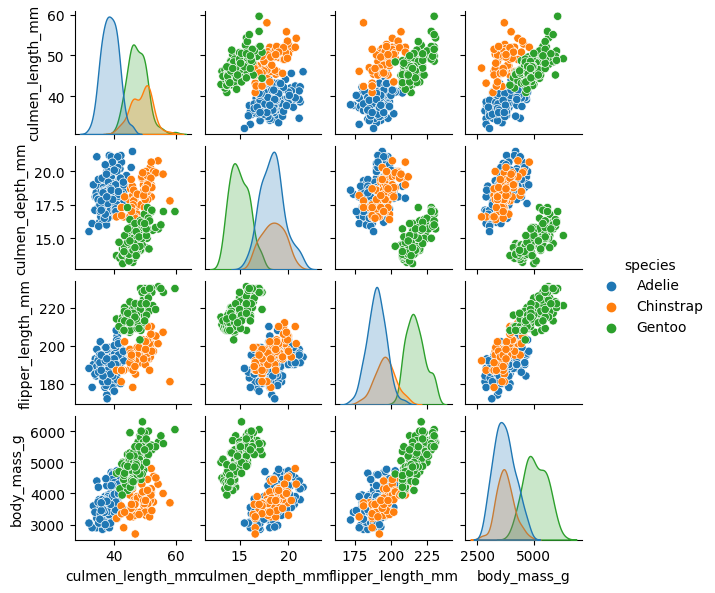

In [8]:
plt.figure(figsize=(10,10))
sns.pairplot(penguin_df.iloc[:,[0,2,3,4,5]], hue='species', height=1.5)
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [10]:
model = make_pipeline(StandardScaler(),
                    SVC()).fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [11]:
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_train, y_train_pred))

[[109   2   2]
 [  4  44   3]
 [  0   1  91]]
              precision    recall  f1-score   support

      Adelie       0.96      0.96      0.96       113
   Chinstrap       0.94      0.86      0.90        51
      Gentoo       0.95      0.99      0.97        92

    accuracy                           0.95       256
   macro avg       0.95      0.94      0.94       256
weighted avg       0.95      0.95      0.95       256



In [12]:
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test, y_test_pred))

[[37  1  0]
 [ 2 15  0]
 [ 0  0 31]]
              precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96        38
   Chinstrap       0.94      0.88      0.91        17
      Gentoo       1.00      1.00      1.00        31

    accuracy                           0.97        86
   macro avg       0.96      0.95      0.96        86
weighted avg       0.96      0.97      0.96        86



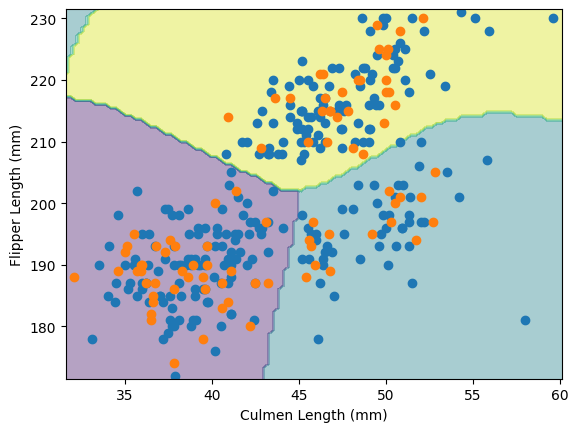

In [13]:
DecisionBoundaryDisplay.from_estimator(model, X, alpha=0.4, eps=0.5)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1])
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1])
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.show()

In [14]:
# Specify the grid: parameters and values
param_grid = {'C': [0.01, 0.1, 0.9], 
              'gamma': [0.1, 0.01, 0.001],
              'kernel': ['rbf','linear','poly','sigmoid']} 
  
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, n_jobs = -1)

start = time()
grid_search.fit(X_train, y_train)
end = time()

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, k

In [15]:
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (end- start, len(grid_search.cv_results_["params"])))

# Print best parameters after tuning
print(f'Best Parameters: {grid_search.best_params_}')
  
# Print how our model looks after hyper-parameter tuning
print(f'Best Estimator: {grid_search.best_estimator_}')

y_train_predict = grid_search.predict(X_train)
y_test_predict = grid_search.predict(X_test)

GridSearchCV took 5.48 seconds for 36 candidate parameter settings.
Best Parameters: {'C': 0.01, 'gamma': 0.01, 'kernel': 'poly'}
Best Estimator: SVC(C=0.01, gamma=0.01, kernel='poly')


              precision    recall  f1-score   support

      Adelie       0.96      0.97      0.97       113
   Chinstrap       0.94      0.88      0.91        51
      Gentoo       0.97      0.99      0.98        92

    accuracy                           0.96       256
   macro avg       0.96      0.95      0.95       256
weighted avg       0.96      0.96      0.96       256



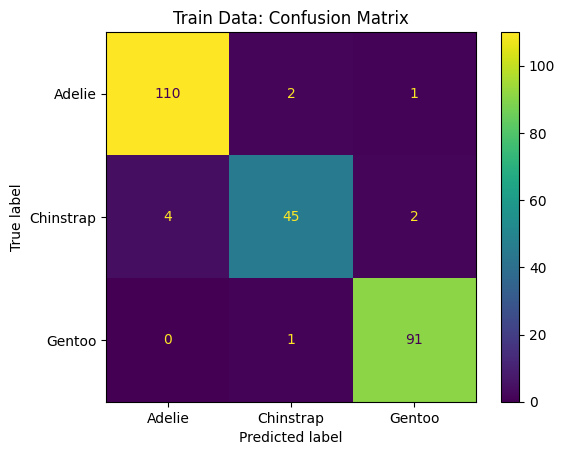

In [20]:
# print classification report
print(classification_report(y_train, y_train_predict))

cfm = confusion_matrix(y_train, y_train_predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels =  ['Adelie','Chinstrap','Gentoo'])
cm_display.plot()
plt.title('Train Data: Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96        38
   Chinstrap       0.94      0.88      0.91        17
      Gentoo       1.00      1.00      1.00        31

    accuracy                           0.97        86
   macro avg       0.96      0.95      0.96        86
weighted avg       0.96      0.97      0.96        86



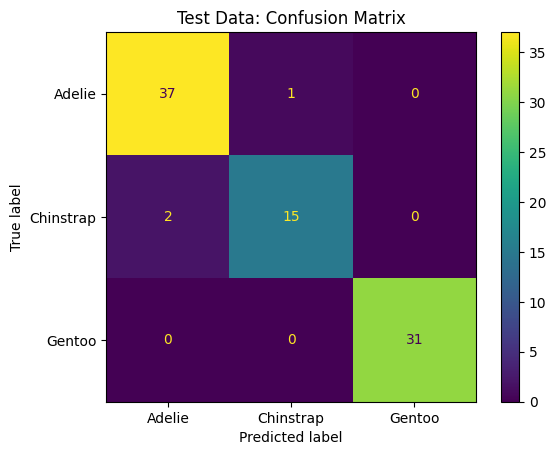

In [19]:
# print classification report
print(classification_report(y_test, y_test_predict))

cfm = confusion_matrix(y_test, y_test_predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ['Adelie','Chinstrap','Gentoo'])
cm_display.plot()
plt.title('Test Data: Confusion Matrix')
plt.show()

## Part 2. Predicting Bike Sharing Demand

In [23]:
bike_df = pd.read_csv('SeoulBikeData.csv', encoding='latin1')
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [24]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [27]:
bike_df.Seasons.value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [30]:
X =  bike_df[bike_df['Seasons'] == 'Winter'].iloc[:,2:11]
y =  bike_df[bike_df['Seasons'] == 'Winter']['Rented Bike Count']

X.head() 

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


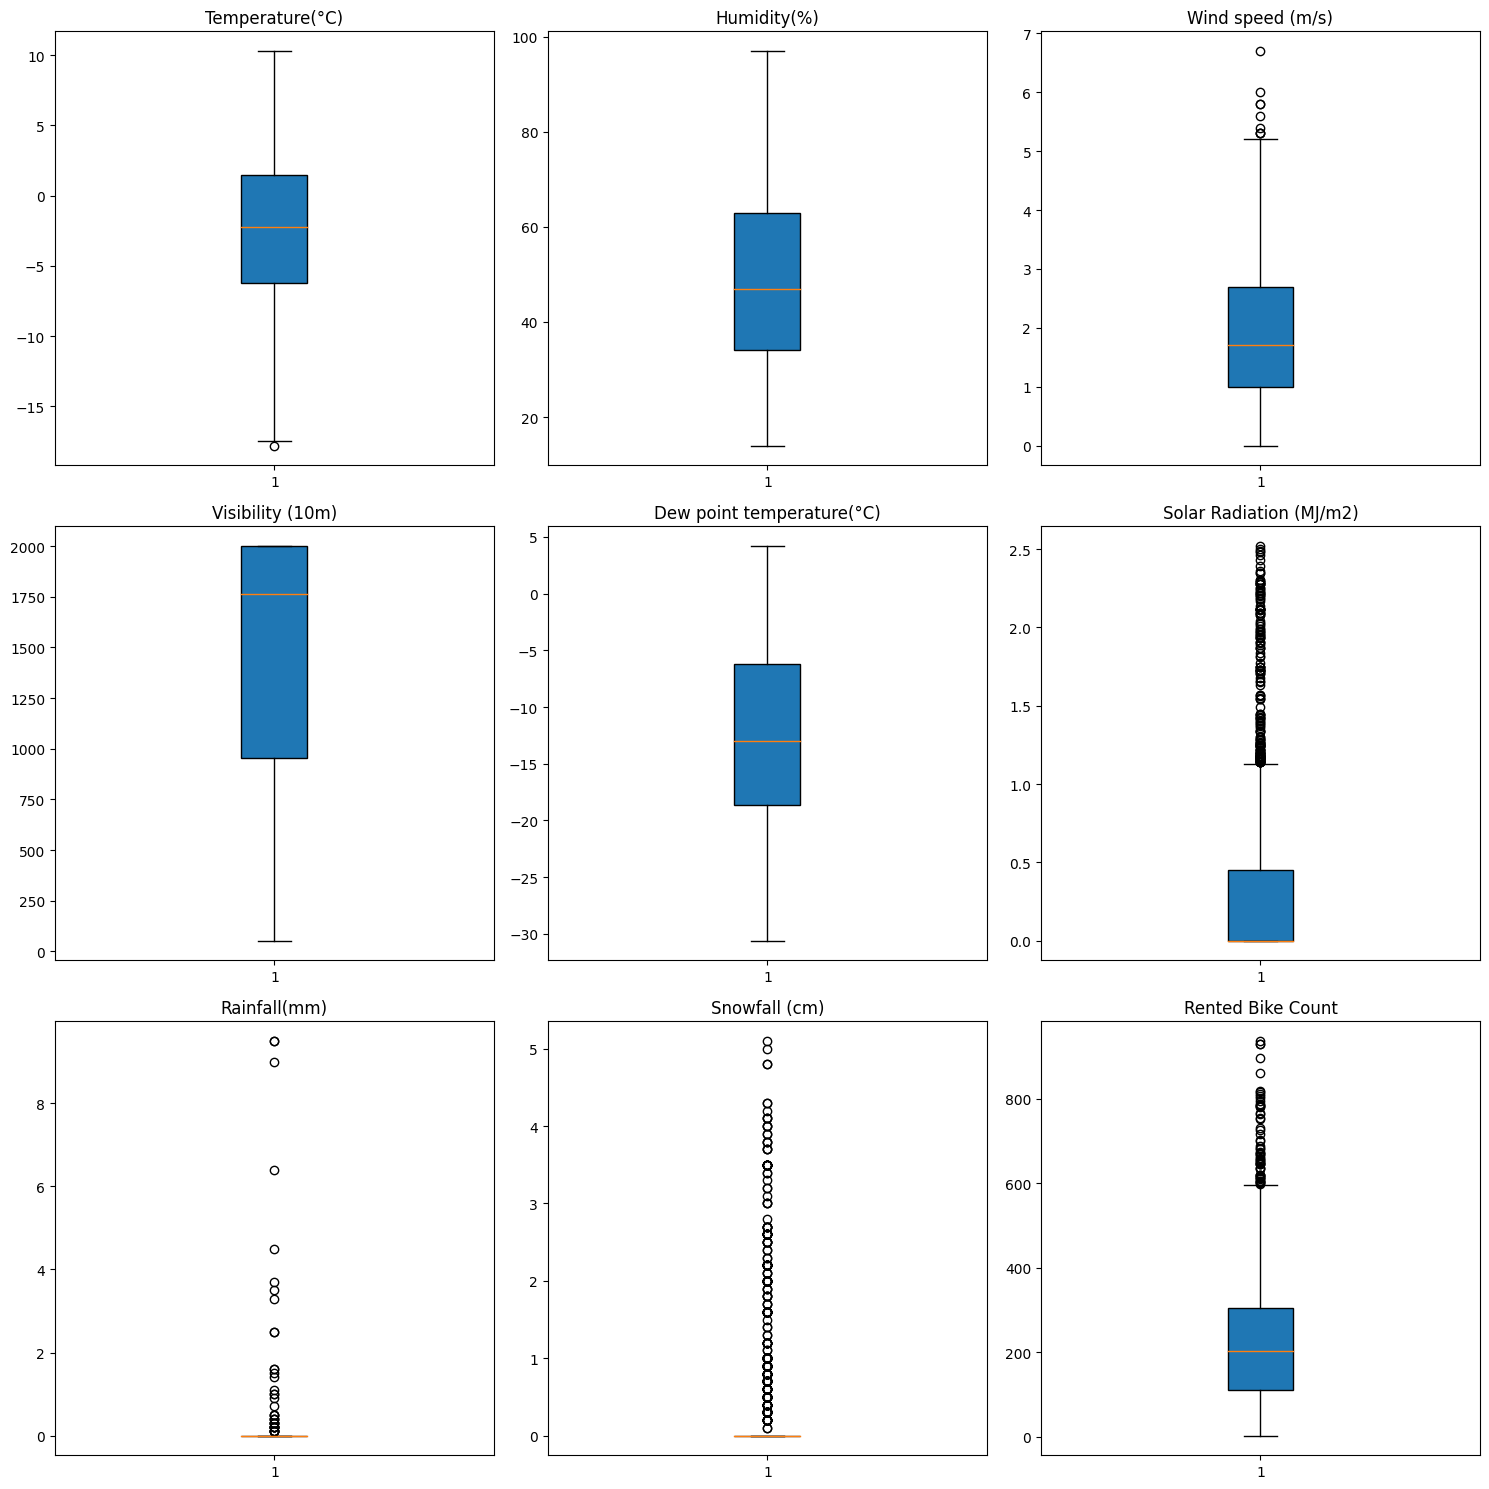

In [33]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i in range(8):
        row = i // 3
        col = i % 3
        axs[row, col].boxplot(X.iloc[:, i+1], patch_artist=True)
        axs[row, col].set_title(X.columns[i+1])

# Generate box plot for y
axs[-1, -1].boxplot(y, patch_artist=True)
axs[-1, -1].set_title("Rented Bike Count")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [92]:
# Specify the grid: parameters and values
param_grid = {'svr__epsilon': [0.01, 0.1, 0.9], 
              'svr__gamma': [0.1, 0.01, 0.001],
              'svr__kernel': ['rbf','linear','poly','sigmoid']} 

svr_pipeline = make_pipeline(StandardScaler(), SVR())
  
grid_search = GridSearchCV(svr_pipeline, param_grid, refit=True, n_jobs = -1)

start = time()
grid_search.fit(X_train, y_train)
end = time()

In [93]:
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (end- start, len(grid_search.cv_results_["params"])))

# Print best parameters after tuning
print(f'Best Parameters: {grid_search.best_params_}')
  
# Print how our model looks after hyper-parameter tuning
print(f'Best Estimator: {grid_search.best_estimator_}')

y_train_predict = grid_search.predict(X_train)
y_test_predict = grid_search.predict(X_test)

svr_r2 = grid_search.score(X_test, y_test)
svr_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
print(f'Test RMSE: {svr_rmse}')
print(f'Test R^2: {svr_r2}')

GridSearchCV took 2.15 seconds for 36 candidate parameter settings.
Best Parameters: {'svr__epsilon': 0.9, 'svr__gamma': 0.1, 'svr__kernel': 'linear'}
Best Estimator: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.9, gamma=0.1, kernel='linear'))])
Test RMSE: 121.92438364930884
Test R^2: 0.303286118620828


In [ ]:
# Specify the grid: parameters and values
param_grid = {'kernelridge__alpha': [0.01, 0.1, 0.5, 1, 5, 10], 
              'kernelridge__gamma': [0.9, 0.1, 0.01, 0.001, 5, 10],
              'kernelridge__kernel': ['rbf','linear','poly','sigmoid']} 

krr_pipeline = make_pipeline(StandardScaler(), KernelRidge())
  
grid_search = GridSearchCV(krr_pipeline, param_grid, refit=True, n_jobs = -1)

start = time()
grid_search.fit(X_train, y_train)
end = time()

In [96]:
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (end- start, len(grid_search.cv_results_["params"])))

# Print best parameters after tuning
print(f'Best Parameters: {grid_search.best_params_}')
  
# Print how our model looks after hyper-parameter tuning
print(f'Best Estimator: {grid_search.best_estimator_}')

y_train_predict = grid_search.predict(X_train)
y_test_predict = grid_search.predict(X_test)

krr_r2 = grid_search.score(X_test, y_test)
krr_rmse = mean_squared_error(y_test, y_test_predict, squared = False)
print(f'Test RMSE: {krr_rmse}')
print(f'Test R^2: {krr_r2}')

GridSearchCV took 46.48 seconds for 144 candidate parameter settings.
Best Parameters: {'kernelridge__alpha': 0.01, 'kernelridge__gamma': 0.1, 'kernelridge__kernel': 'rbf'}
Best Estimator: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kernelridge',
                 KernelRidge(alpha=0.01, gamma=0.1, kernel='rbf'))])
Test RMSE: 102.77718910376497
Test R^2: 0.5362493375728385


In [97]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [98]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [99]:
slr = LinearRegression().fit(X_train, y_train)
y_test_pred = slr.predict(X_test)

slr_r2 = slr.score(X_test, y_test)
slr_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
print(f'Test RMSE: {slr_rmse}')
print(f'Test R^2: {slr_r2}')

Test RMSE: 121.92438364930884
Test R^2: 0.3473622225187625


The Kernel Ridge Regression had the lowest RMSE and highest R^2 on unseen data among the three methods. This means that the KRR model is able to most reasonably predict the number of bikes that are going to be rented based on weather conditions. However, it is worth noting that the R^2 on the test data for the KRR model is only 53.62%, which means that the model can only account for about half of the variation in the number of bike rentals. It is therefore recommended to explore other features or collect more data to improve the performance of the model.